import important libraries

In [1]:
import os
import cv2 as cv
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

use mnist dataset

In [2]:
mnist = tf.keras.datasets.mnist

split the data

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


normalize the data

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

reshape the data

In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

view the data shape

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


build convolutional neural network


In [7]:

model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

choose loss and optimizer

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

train the model

In [9]:
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 153s 81ms/step - loss: 0.1191 - accuracy: 0.9627 - val_loss: 0.0538 - val_accuracy: 0.9832
Epoch 2/5
1875/1875 [==============================] - 148s 79ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0337 - val_accuracy: 0.9894
Epoch 3/5
1875/1875 [==============================] - 149s 80ms/step - loss: 0.0290 - accuracy: 0.9909 - val_loss: 0.0279 - val_accuracy: 0.9910
Epoch 4/5
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0373 - val_accuracy: 0.9888
Epoch 5/5
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0304 - val_accuracy: 0.9905


we print thr accuracy which is 99%

In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 7s 21ms/step - loss: 0.0304 - accuracy: 0.9905
Test accuracy: 0.9904999732971191


we save the model

In [11]:
model.save('handwritten_char')

we load the model to test it

In [12]:
model = tf.keras.models.load_model('handwritten_char')

we test in real handwritten numbers to see if the model works


1/1 [==============================] - 0s 23ms/step
This digit is probably a 3


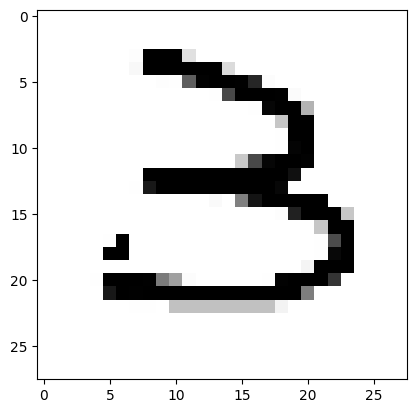

1/1 [==============================] - 0s 21ms/step
This digit is probably a 1


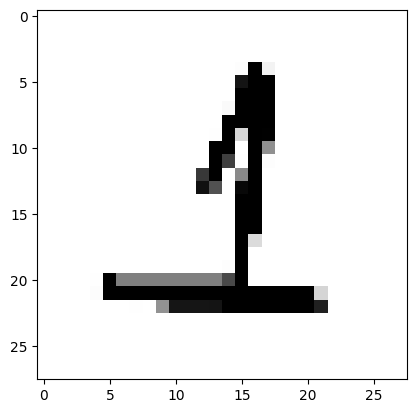

1/1 [==============================] - 0s 26ms/step
This digit is probably a 7


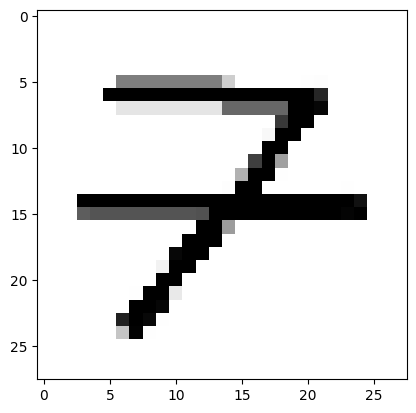

1/1 [==============================] - 0s 21ms/step
This digit is probably a 2


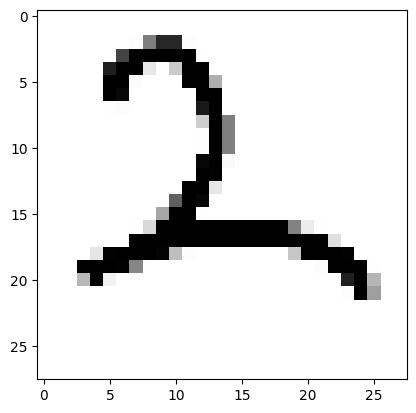

1/1 [==============================] - 0s 22ms/step
This digit is probably a 5


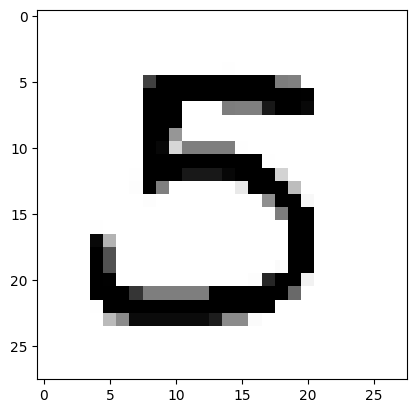

1/1 [==============================] - 0s 22ms/step
This digit is probably a 8


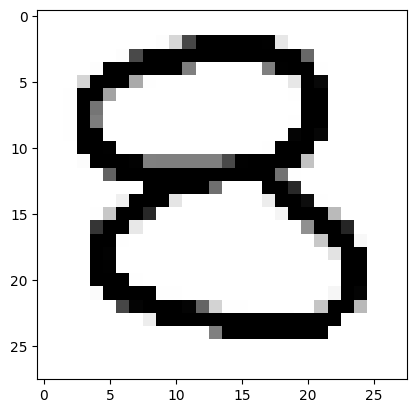

1/1 [==============================] - 0s 26ms/step
This digit is probably a 4


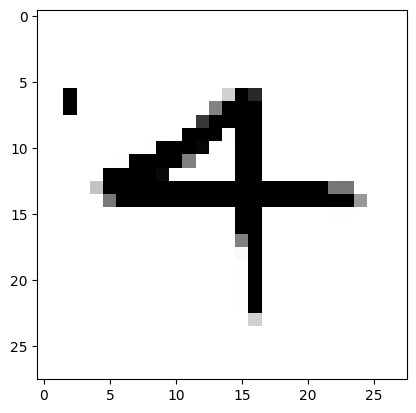

In [14]:
image_number = 1
while os.path.isfile(f"/content/{image_number}image.jpg"):
    try:
        # Load the image
        img = cv.imread(f"/content/{image_number}image.jpg", cv.IMREAD_GRAYSCALE)

        # Preprocess the image
        img = cv.resize(img, (28, 28))  # Assuming your model expects 28x28 images
        img = np.invert(img)
        img = img.reshape(1, 28, 28, 1)  # Reshape to match the input shape expected by the model

        # Make a prediction
        prediction = model.predict(img)

        # Display the result
        predicted_digit = np.argmax(prediction)
        print(f"This digit is probably a {predicted_digit}")

        plt.imshow(np.squeeze(img), cmap=plt.cm.binary)
        plt.show()

    except Exception as e:
        print(f"Error processing digit{image_number}: {e}")
        print("Error!")

    finally:
        image_number += 1